# continuous density values dataset

In [1]:
from NNOpt import WarmStartDataGen,WarmStartDataSet
from SBIConfig import SBIWarmStartDataConfig
import numpy as np

print("starting")
config = SBIWarmStartDataConfig()
config.set_density(True)
print(config.density)
data_generator = WarmStartDataGen(config)

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7fb87b7e7500>>
Traceback (most recent call last):
  File "/home/users/subaven/pyclaw-flow/pyclaw-flow/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 781, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 
/home/users/subaven/pyclaw-flow/pyclaw-flow/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


shock
starting
True


In [3]:
print("starting generation, lores, 100 timesteps")
data_generator.generate_data(run_number=3, num_samples=100, multiprocessing=True)

starting generation, lores, 100 timesteps
density =  True
cpu count: 128


Generating data (mp):   0%|          | 0/100 [00:00<?, ?it/s]/home/users/subaven/pyclaw-flow/wavelet-flow/Euler.py:110: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  infrac,abserr = integrate.quad(ycirc,X[i,j]-dx2,X[i,j]+dx2,args=(ydown,yup),epsabs=1.e-8,epsrel=1.e-5)
/home/users/subaven/pyclaw-flow/wavelet-flow/Euler.py:110: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  infrac,abserr = integrate.quad(ycirc,X[i,j]-dx2,X[i,j]+dx2,args=(ydown,yup),epsabs=1.e-8,epsrel=1.e-5)
/home/users/subaven/pyclaw-flow/wavelet-flow/Euler.py:110: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  infrac,abserr = integrate.quad(ycirc,X[i,j]-dx2,X[i,j]+dx2,args=(ydown,yup),epsabs=1.e-8,epsrel=1.e-5)
/home/users/subaven/pyclaw-flow/wavelet-flow/Euler.py:110: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  infrac,abserr = integrate.quad(ycirc,X[i,j]-dx2,X[i,j]+dx2,args=(ydown,yup

Data saved to Data/WarmStart/run_3/warm_start_data_1e2_run_3.h5


/home/users/subaven/pyclaw-flow/wavelet-flow/Euler.py:110: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  infrac,abserr = integrate.quad(ycirc,X[i,j]-dx2,X[i,j]+dx2,args=(ydown,yup),epsabs=1.e-8,epsrel=1.e-5)
/home/users/subaven/pyclaw-flow/wavelet-flow/Euler.py:110: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  infrac,abserr = integrate.quad(ycirc,X[i,j]-dx2,X[i,j]+dx2,args=(ydown,yup),epsabs=1.e-8,epsrel=1.e-5)
/home/users/subaven/pyclaw-flow/wavelet-flow/Euler.py:110: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  infrac,abserr = integrate.quad(ycirc,X[i,j]-dx2,X[i,j]+dx2,args=(ydown,yup),epsabs=1.e-8,epsrel=1.e-5)
/home/users/subaven/pyclaw-flow/wavelet-flow/Euler.py:110: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  infrac,abserr = integrate.quad(ycirc,X[i,j]-dx2,X[i,j]+dx2,args=(ydown,yup),epsabs=1.e-8,epsrel=1.e-5)
/home/users/subaven/pyclaw-flow/

In [4]:
print('loading density data')
data_fp = 'Data/WarmStart/run_1/warm_start_data_1e1_run_1.h5'
base_dataset = WarmStartDataSet(data_fp)
print('loaded density data')

loading density data
loaded density data


torch.Size([100, 100, 25])


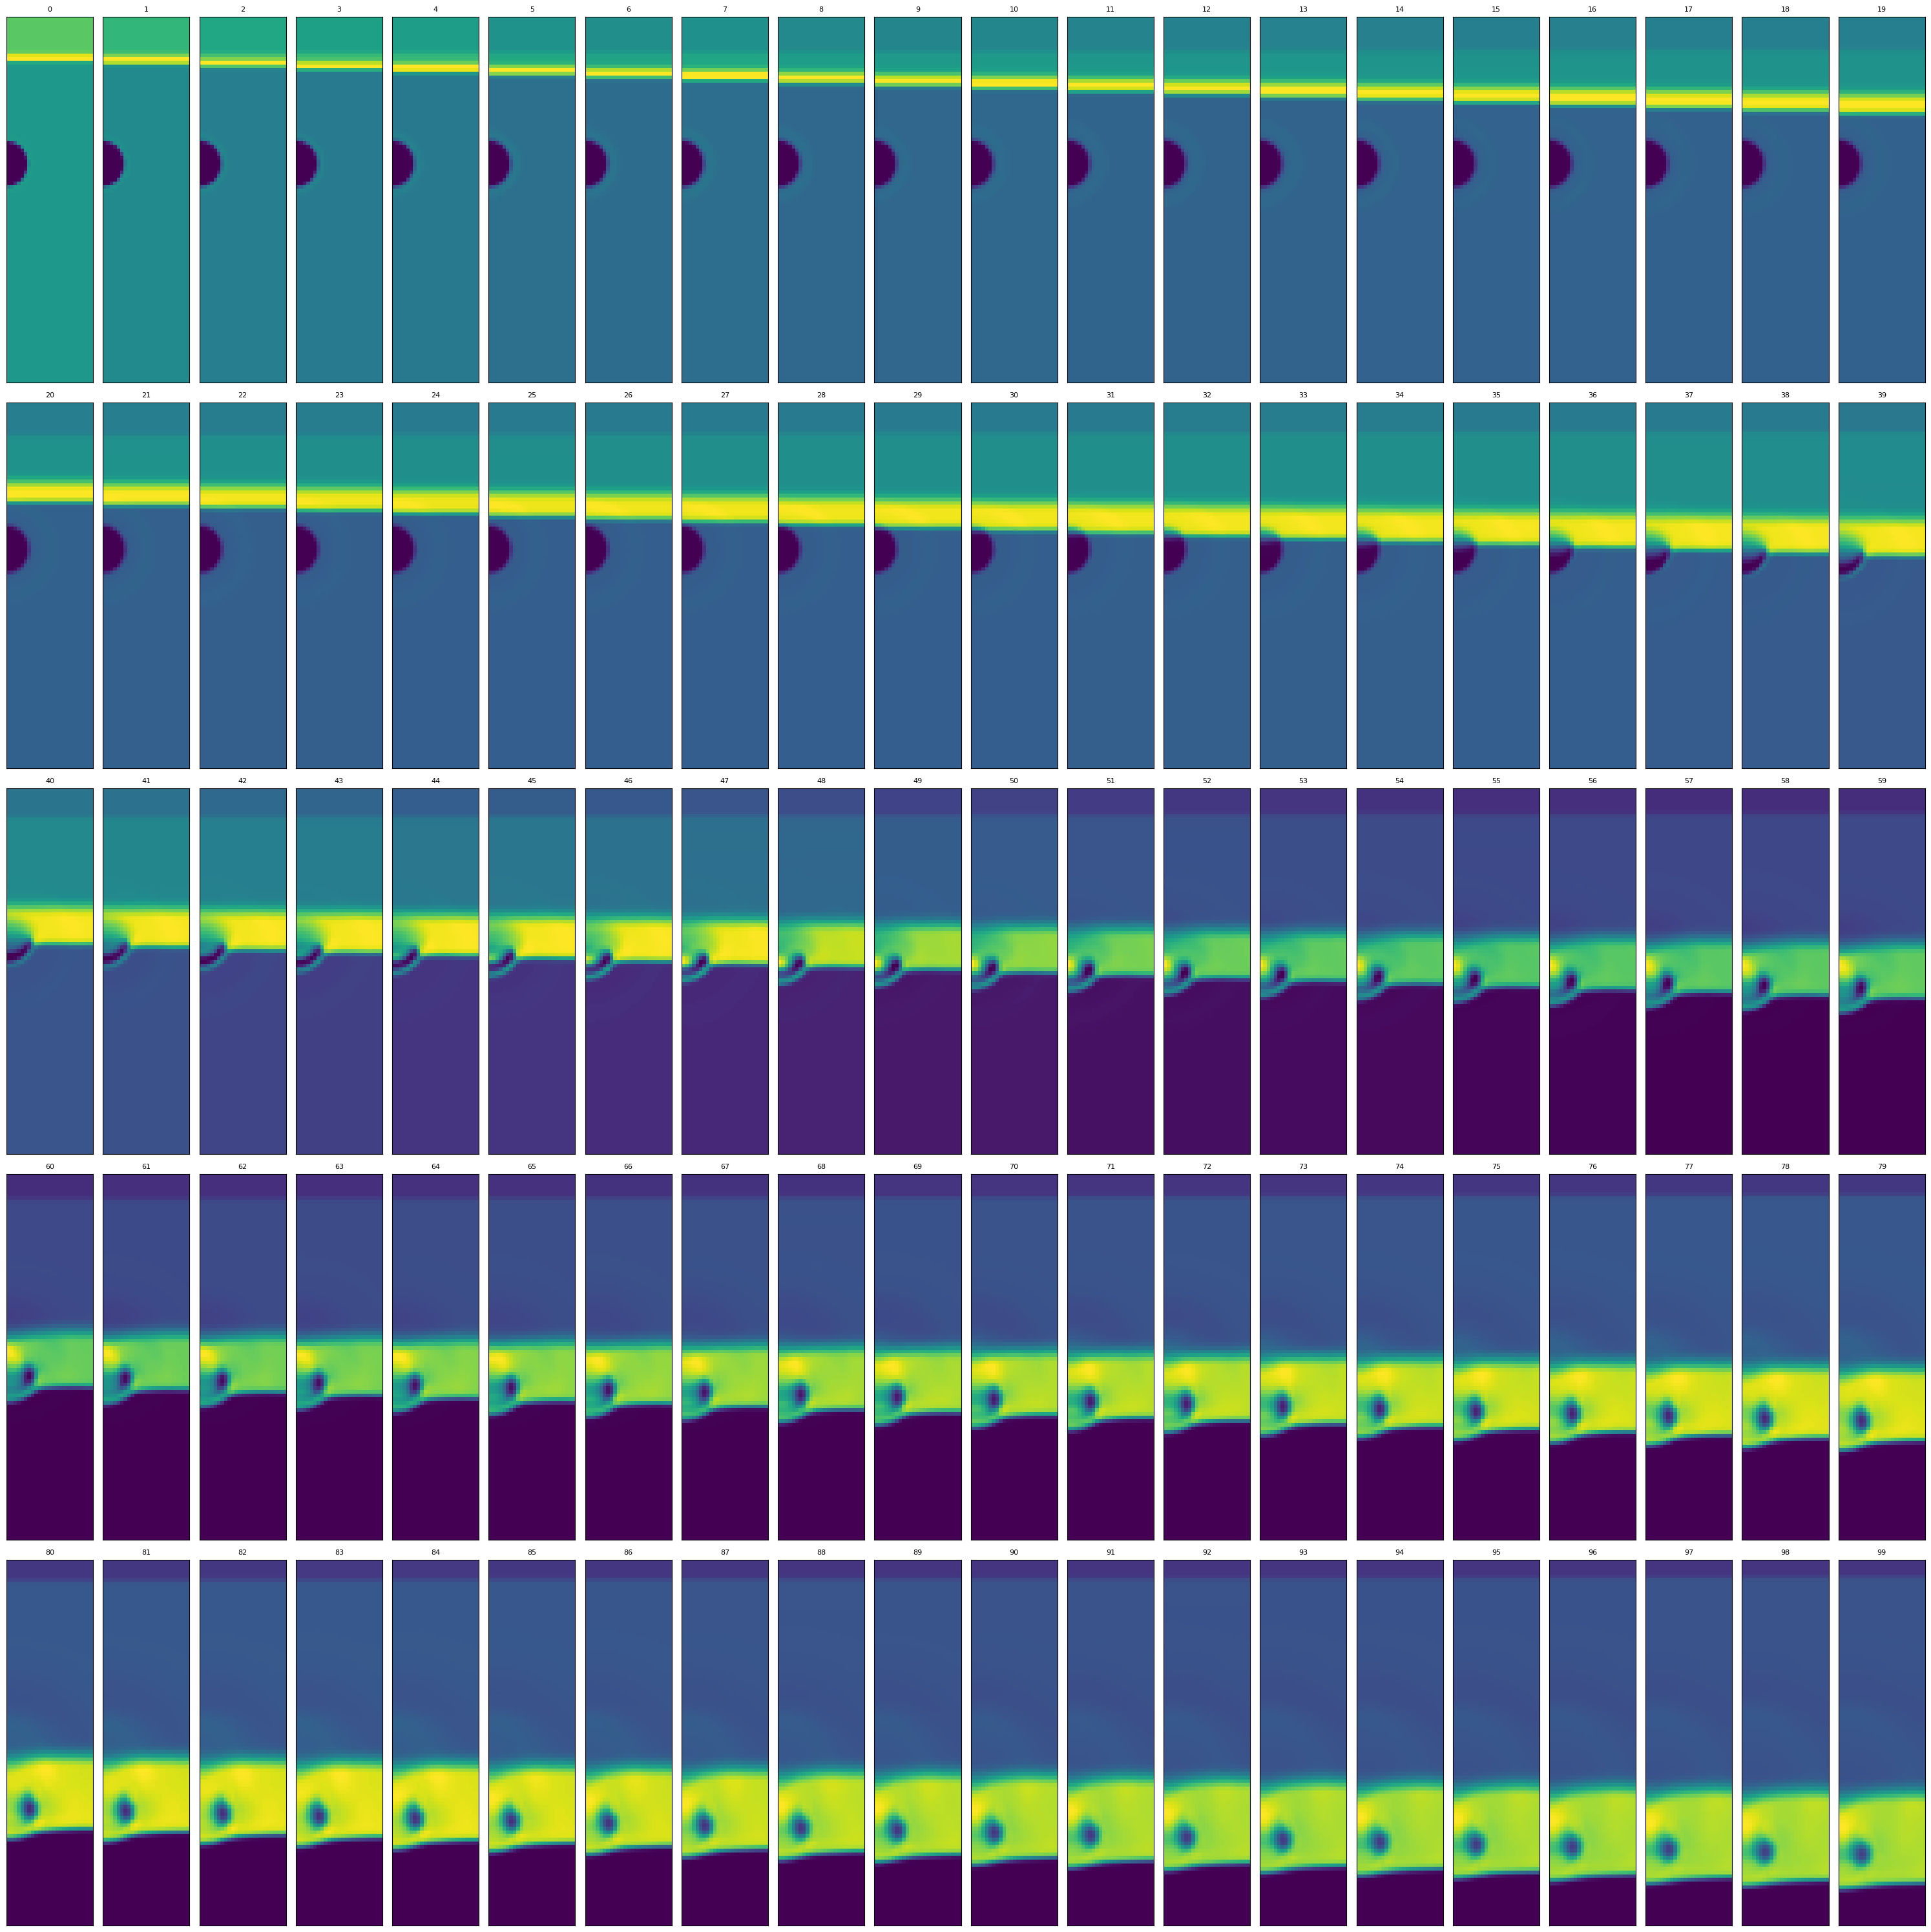

In [10]:
# visualization
import torch
import matplotlib.pyplot as plt
import numpy as np

print(base_dataset[0]['observations'].shape)
tensor = base_dataset[0]['observations']
n_rows = 5
n_cols = 20
fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 30))

# Flatten axes array for easier indexing
axes_flat = axes.flatten()

# Plot each observation
for idx in range(100):
    img = tensor[idx].numpy()
    ax = axes_flat[idx]
    im = ax.imshow(img, aspect='auto', cmap='viridis')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'{idx}', fontsize=8)

plt.tight_layout()

generate a bigger dataset, this one now has 100 samples (each sample has a different initial system state)

In [6]:
print("starting generation, lores, 100 timesteps")
data_generator.generate_data(run_number=4, num_samples=1000, multiprocessing=True)

starting generation, lores, 100 timesteps
density =  True
cpu count: 128


Generating data (mp): 100%|██████████| 1000/1000 [03:07<00:00,  5.33it/s]


Data saved to Data/WarmStart/run_4/warm_start_data_1e3_run_4.h5


# discrete, shock location dataset

In [4]:
config1 = SBIWarmStartDataConfig()
config1.set_density(False)
print(config1.density)
data_generator1 = WarmStartDataGen(config1)

False


In [5]:
print("starting generation, lores, 100 timesteps continuous")
data_generator1.generate_data(run_number=2, num_samples=100, multiprocessing=True)

starting generation, lores, 100 timesteps continuous
density =  False
cpu count: 128


Generating data (mp): 100%|██████████| 100/100 [00:19<00:00,  5.05it/s]


Data saved to Data/WarmStart/run_2/warm_start_data_1e2_run_2.h5


loading shock location data
loaded shock location data
torch.Size([100, 100, 25])


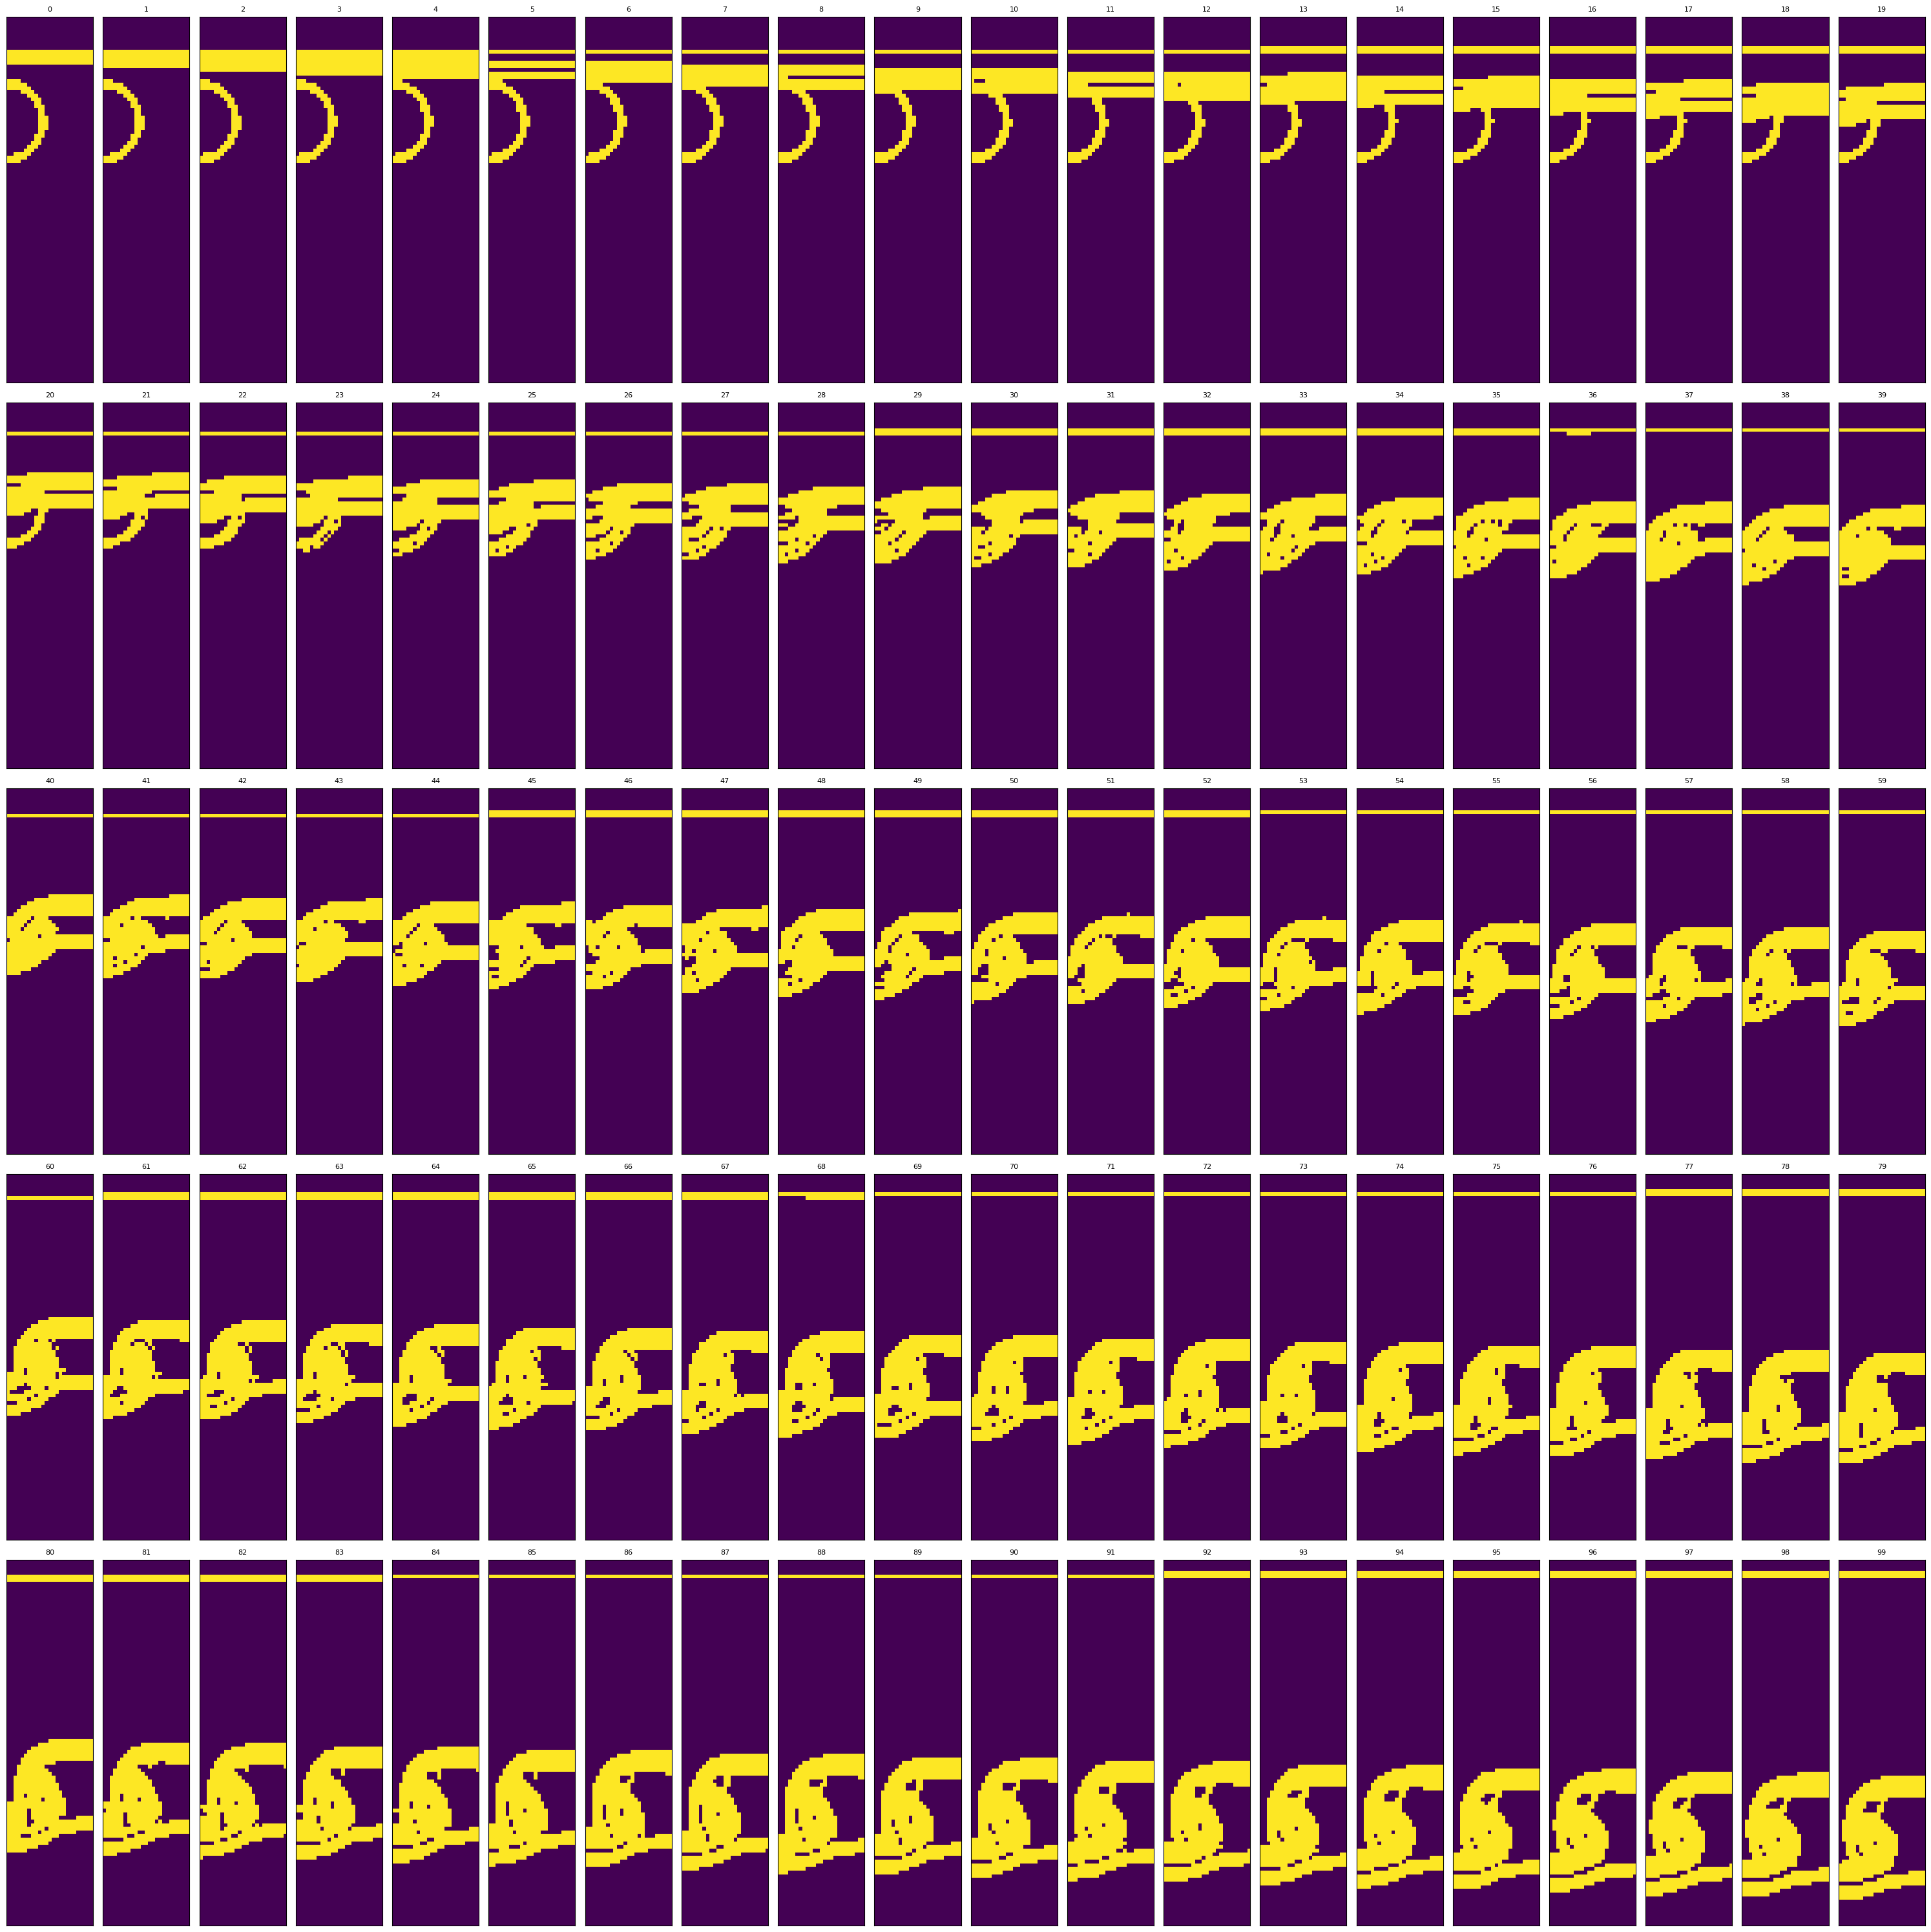

In [15]:
print('loading shock location data')
data_fp1 = 'Data/WarmStart/run_2/warm_start_data_1e1_run_2.h5'
base_dataset1 = WarmStartDataSet(data_fp1)
print('loaded shock location data')
print(base_dataset1[1]['observations'].shape)
tensor = base_dataset1[1]['observations']
n_rows = 5
n_cols = 20
fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 30))

# Flatten axes array for easier indexing
axes_flat = axes.flatten()

# Plot each observation
for idx in range(100):
    img = tensor[idx].numpy()
    ax = axes_flat[idx]
    im = ax.imshow(img, aspect='auto', cmap='viridis')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'{idx}', fontsize=8)

plt.tight_layout()